## Load tags json and show stats and images

In [1]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# !pip install cv2

../airport_chips/0.json
{
  "version": "3.16.7",
  "flags": {},
  "shapes": [
    {
      "label": "airplane",
      "line_color": null,
      "fill_color": null,
      "points": [
        [
          75.89473684210526,
          727.5263157894736
        ],
        [
          148.52631578947364,
          795.9473684210526
        ]
      ],
      "shape_type": "rectangle",
      "flags": {}
    },
    {
      "label": "airplane",
      "line_color": null,
      "fill_color": null,
      "points": [
        [
          6.4210526315789025,
          906.4736842105262
        ],
        [
          84.31578947368416,
          988.5789473684209
        ]
      ],
      "shape_type": "rectangle",
      "flags": {}
    },
    {
      "label": "airplane",
      "line_color": null,
      "fill_color": null,
      "points": [
        [
          100.10526315789468,
          904.3684210526316
        ],
        [
          175.8947368421052,
          987.5263157894736
        ]
      ],
  

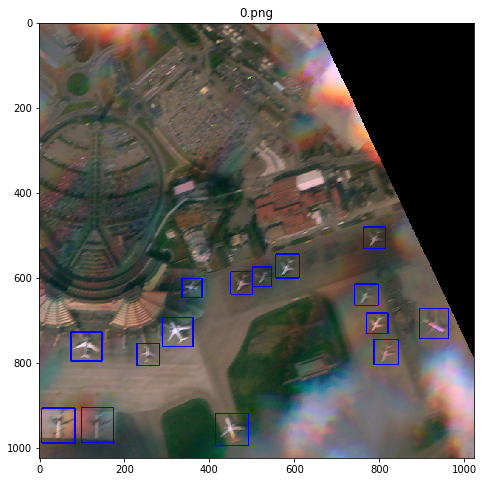

../airport_chips/1.json


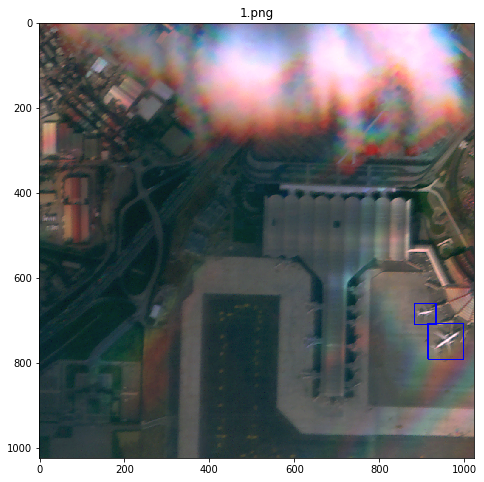

../airport_chips/10.json


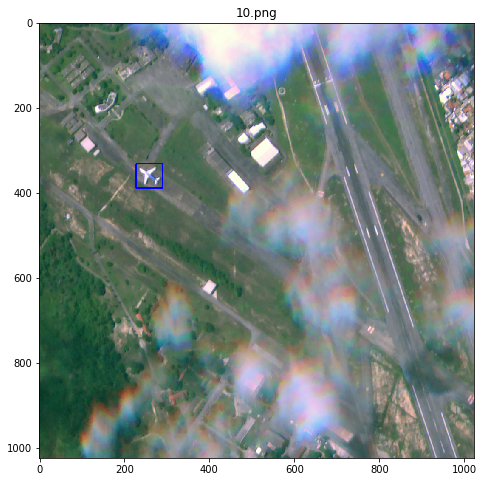

../airport_chips/100.json


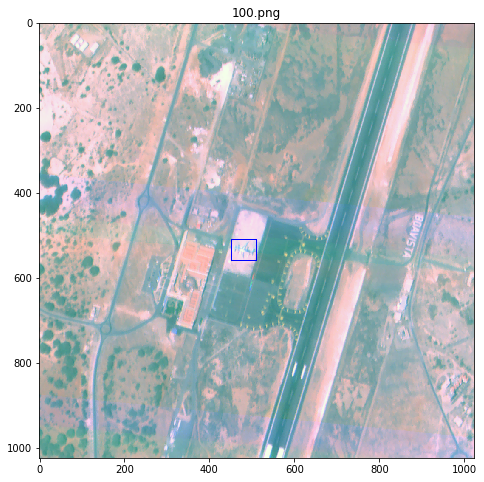

../airport_chips/101.json


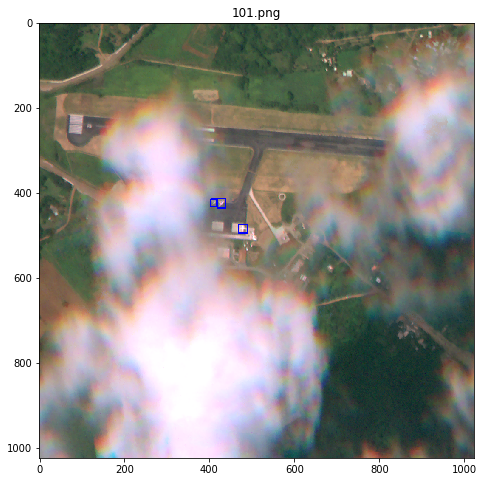

../airport_chips/11.json
../airport_chips/12.json
../airport_chips/13.json
../airport_chips/14.json
../airport_chips/15.json
../airport_chips/16.json
../airport_chips/17.json
../airport_chips/18.json
../airport_chips/19.json
../airport_chips/2.json
../airport_chips/20.json
../airport_chips/21.json
../airport_chips/22.json
../airport_chips/23.json
../airport_chips/24.json
../airport_chips/25.json
../airport_chips/26.json
../airport_chips/27.json
../airport_chips/28.json
../airport_chips/29.json
../airport_chips/30.json
../airport_chips/31.json
../airport_chips/32.json
../airport_chips/33.json
../airport_chips/34.json
../airport_chips/35.json
../airport_chips/36.json
../airport_chips/37.json
../airport_chips/38.json
../airport_chips/39.json
../airport_chips/4.json
../airport_chips/40.json
../airport_chips/41.json
../airport_chips/42.json
../airport_chips/43.json
../airport_chips/44.json
../airport_chips/45.json
../airport_chips/46.json
../airport_chips/47.json
../airport_chips/48.json
..

(array([214., 206., 132., 217., 150.,  59.,  53.,  30.,  23.,   8.]),
 array([ 11.        ,  19.97905138,  28.95810277,  37.93715415,
         46.91620553,  55.89525692,  64.8743083 ,  73.85335968,
         82.83241107,  91.81146245, 100.79051383]),
 <a list of 10 Patch objects>)

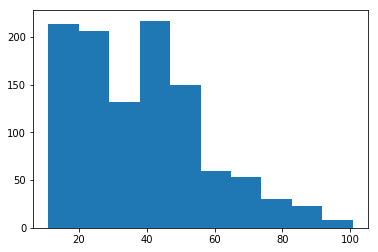

In [3]:
import json
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import cv2

json_path = "../airport_chips/"
planes_path = "../airport_crop/"

diams = []

for i, json_file in enumerate(os.listdir(json_path)):
    print(json_path+json_file)
    
    f = open(json_path+json_file)
    tags = json.load(f)
    f.close()
    tags["imageData"] = tags["imageData"][:80]+"..."
    if i==0:
        print(json.dumps(tags, indent=2))
        print(tags["imagePath"], " Size", tags["imageHeight"], tags["imageWidth"], " Tags", len(tags["shapes"]))
    img = cv2.imread(planes_path+tags["imagePath"])
    for sh in tags["shapes"]:
        p = sh["points"]
        diams.append(max(abs(p[1][0]-p[0][0]), abs(p[1][1]-p[0][1])))
        color = (0,255,0) if sh["label"]=="mov_airplane" else (255,0,0)
        cv2.rectangle(img, (int(p[0][0]),int(p[0][1])), (int(p[1][0]),int(p[1][1])), color, 2)
    if i<5:
        out_rgb = img[:,:,::-1].copy()
        plt.figure(figsize=(8,8))
        plt.imshow(out_rgb)
        plt.title(tags["imagePath"])
        plt.show()

print(np.mean(diams), min(diams), max(diams))
plt.hist(diams)


In [3]:
# shapes: points: list, [
#           75.89473684210526,
#           727.5263157894736
#         ],
#         [
#           148.52631578947364,
#           795.9473684210526
#         ]

In [4]:
# Check image dimensions
json_path = "../airport_chips/"
planes_path = "../airport_crop/"

diams = []

for i, json_file in enumerate(os.listdir(json_path)):
    f = open(json_path+json_file)
    tags = json.load(f)
    f.close()
    if tags["imageHeight"] != 1024 or tags["imageWidth"] != 1024:
        print(tags["imageHeight"], tags["imageWidth"])
print('All other images have dimension 1024x1024' )

All other images have dimension 1024x1024


In [5]:
# Some stats on the boxes

def get_dim_boxes(tl, br):
    """
    Receives coordinates of top-left and bottom-right points,
    returns width, height, diagonal width (which is the length of the segment of the top-left and
    bottom-right vertices), w/h ratio, and area
    
    Inputs:
    - tl, br: tuple of reals (x1, x2)
    
    Returns:
    - width, height, diag, w/h ratio, area 
    """
    tl_x, tl_y = tl
    br_x, br_y = br 
    w, h = abs(br_x-tl_x), abs(br_y-tl_y)
    return w, h, (w**2+h**2)**.5, w/h, w*h 
    
json_path = "../airport_chips/"
planes_path = "../airport_crop/"

box_data = np.zeros(5) # 4 columns corrspond to width, height, w/h ratio, area 
num_box_in_image = []


for i, json_file in enumerate(os.listdir(json_path)):
    f = open(json_path+json_file)
    tags = json.load(f)
    f.close()
    num_box_in_image.append(len(tags['shapes']))
    for j, box in enumerate(tags['shapes']):
        tl, br = box["points"]
        w, h, diag, rat, area = get_dim_boxes(tl, br)
#         if area <200:
            
#             img = cv2.imread(planes_path+tags["imagePath"])
# #             for sh in tags["shapes"]:
#             p = box["points"]
#             print(tl, br)
#             diams.append(max(abs(p[1][0]-p[0][0]), abs(p[1][1]-p[0][1])))
#             color = (0,255,0) if box["label"]=="mov_airplane" else (255,0,0)
#             cv2.rectangle(img, (int(p[0][0]),int(p[0][1])), (int(p[1][0]),int(p[1][1])), color, 2)
# #             if i<5:
#             out_rgb = img[:,:,::-1].copy()
#             plt.figure(figsize=(8,8))
#             plt.imshow(out_rgb)
#             plt.title(tags["imagePath"])
#             plt.show()
        box_data = np.vstack((box_data, np.array(get_dim_boxes(tl, br))))
box_data = box_data[1:,:]
        


Min: 1 Max:  41


Text(0,0.5,'Counts')

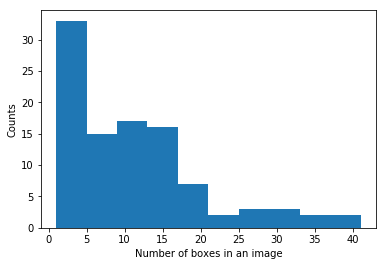

In [6]:
print('Min:', min(num_box_in_image), 'Max: ', max(num_box_in_image))
plt.hist(num_box_in_image)
plt.xlabel("Number of boxes in an image")
plt.ylabel("Counts")


Aspect Ratio: Min:  0.4887218045112782 , Max:  1.73529411764705
Area: Min:  118.56000000000074 , Max:  8199.911976135758
Diag: Min:  15.431137352768314 , Max:  129.41364906495727


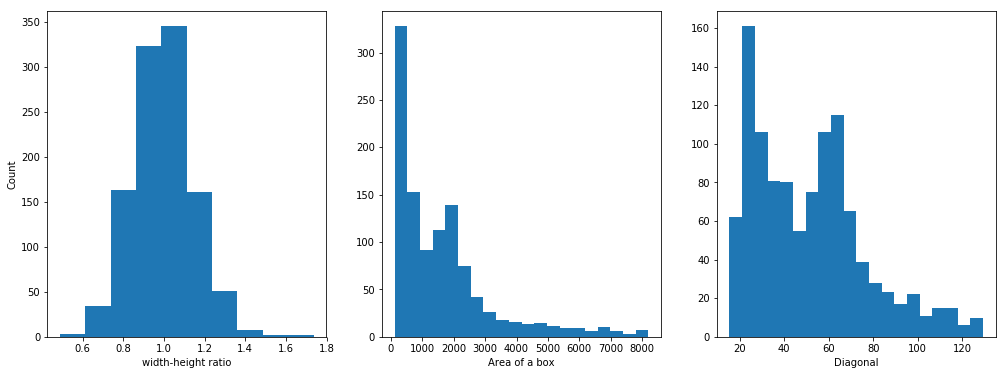

In [7]:
plt.figure(figsize=(17,6))
print('Aspect Ratio: Min: ', min(box_data[:,3]), ', Max: ', max(box_data[:,3]))
print('Area: Min: ', min(box_data[:,4]), ', Max: ', max(box_data[:,4]))
print('Diag: Min: ', min(box_data[:,2]), ', Max: ', max(box_data[:,2]))
# ratio 
plt.subplot(1, 3, 1)
plt.hist(box_data[:,3], bins=10)
plt.xlabel('width-height ratio')
plt.ylabel('Count')

# ratio 
plt.subplot(1, 3, 2)
plt.hist(box_data[:,4], bins=20)
plt.xlabel('Area of a box')

# diagonal length
plt.subplot(1, 3, 3)
plt.hist(box_data[:,2], bins=20)
plt.xlabel('Diagonal')

plt.show()

In [8]:
from scipy import ndimage

def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [9]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

In [10]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak
    
    return (res, weak, strong)

In [11]:
import numpy as np

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


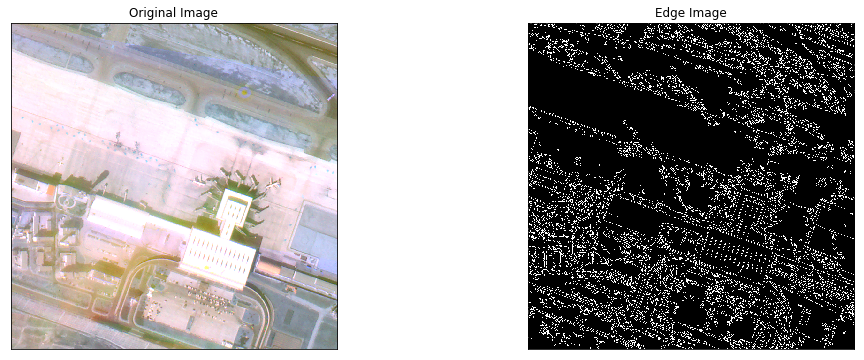

In [12]:
# Detecting edges 
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../airport_crop/30.png')
# print(img)
edges = cv2.Canny(img,0,200)
print(edges)
plt.figure(figsize=(17,6))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

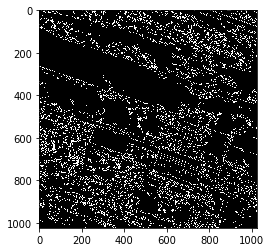

In [13]:
plt.imshow(edges, cmap='gray')

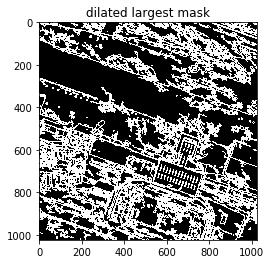

[[False False False ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [14]:
# Dilating the edges 
import numpy as np
import imageio
import h5py
import matplotlib.pyplot as plt
from PIL import Image
from scipy.misc import bytescale
import os, glob
import scipy.misc
import scipy.ndimage
import pandas as pd
import copy
iterations = 1 # experiment with this number!
dilated_edges = scipy.ndimage.morphology.binary_dilation(edges,
                                                        iterations=iterations*2)
plt.imshow(dilated_edges, cmap="gray")
plt.title('dilated largest mask')
plt.show()
# b = np.zeros(a.shape)
print(dilated_edges)

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1024, 1024)


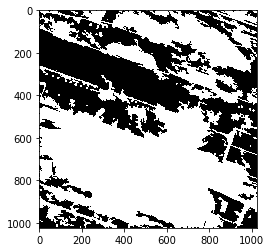

In [15]:
# Fill hole
img_mask = scipy.ndimage.morphology.binary_fill_holes(dilated_edges).astype(int)
plt.imshow(img_mask, cmap="gray")
print(img_mask)
print(img_mask.shape)

795 847 480 533
[[ True  True  True ...  True  True  True]
 [ True  True  True ... False  True  True]
 [ True  True  True ... False  True  True]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


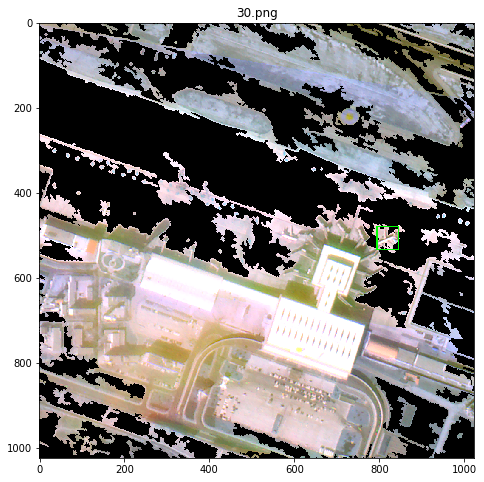

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       [ True,  True,  True, ..., False,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [16]:
# Check if this mask retains the boxes
import copy
f = open('../airport_chips/30.json')
tags = json.load(f)
f.close()
tags["imageData"] = tags["imageData"][:80]+"..."
i = 0
img = cv2.imread(planes_path+tags["imagePath"])
img[img_mask == 0] = (0,0,0)
for sh in tags["shapes"]:
    
    i += 1
    if i !=3:
        continue
    p = sh["points"]
    x1, x2 = int(p[0][0]//1), int(p[1][0]//1+1)
    y1, y2 = int(p[0][1]//1+1), int(p[1][1]//1)
    print(x1,x2,y1,y2)
    print(img_mask[ y1:y2+1, x1:x2] == 1)
    color = (0,255,0)
    cv2.rectangle(img, (int(p[0][0]),int(p[0][1])), (int(p[1][0]),int(p[1][1])), color, 2)
#     print(np.product(img_mask == a))
#     print('-'*10)
#     print(img_mask)
#     out_rgb = img_mask[:,::-1].copy()
    plt.figure(figsize=(8,8))
    plt.imshow(img, cmap="gray")
    plt.title(tags["imagePath"])
    plt.show()
    
    
    
    
# img = cv2.imread('../airport_crop/30.png')
# result = img.copy()
# result[img_mask==0] = (0,0,0)
# plt.imshow(result)
# plt.show()
# color = (0,255,0)
# cv2.rectangle(result, (200,200), (800,800), color, 2)
# plt.imshow(result)
# plt.show()
img_mask[ y1:y2+1, x1:x2] == 1

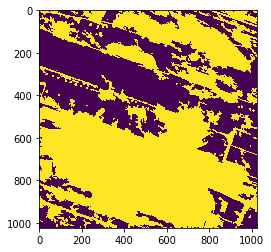

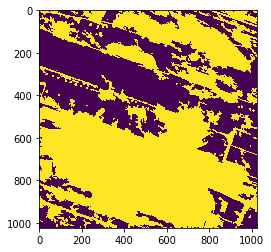

In [19]:
plt.imshow(img_mask)
plt.show()
img_mask = img_mask * 255

cv2.circle(img, (500,500), 100, (0,0,0))
plt.imshow(img_mask)
plt.show()

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] (10, 10)


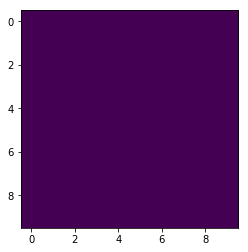

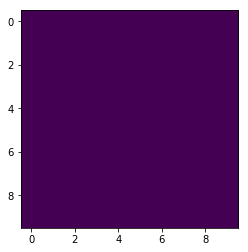

In [160]:
img = cv2.imread('../airport_crop/30.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# gray = img_mask * 254 +1 
gray = np.zeros((10,10))
print(gray, gray.shape)
plt.imshow(gray)
plt.show()
x1,y1 = 200,200
x2,y2=800,800
cv2.rectangle(gray,(2,2),(6,6),1,10)
plt.imshow(gray)
plt.show()

[[0 0 0 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


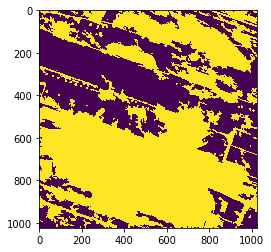

In [25]:
heir = np.ones((100,100))
heir = img_mask
print(heir)

cv2.rectangle(heir,(20,20),(80,80),(255,255,0),5)
plt.imshow(heir)

In [30]:
!pip install cv

ERROR: Could not find a version that satisfies the requirement cv (from versions: none)
ERROR: No matching distribution found for cv


In [29]:
img = cv2.imread('../airport_crop/30.png')
b = np.zeros(img.shape)
b[dilated_largest_mask] = img[dilated_largest_mask]


ModuleNotFoundError: No module named 'cv'

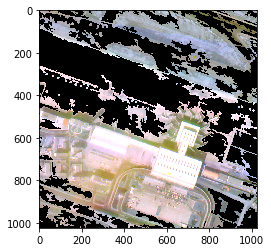

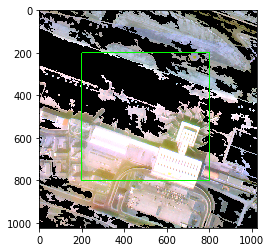

In [38]:
img = cv2.imread('../airport_crop/30.png')
result = img.copy()
result[img_mask==0] = (0,0,0)
plt.imshow(result)
plt.show()
color = (0,255,0)
cv2.rectangle(result, (200,200), (800,800), color, 2)
plt.imshow(result)
plt.show()

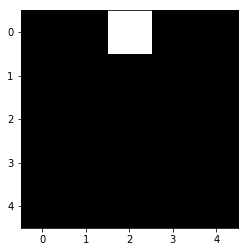

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = np.zeros((5,5))  # initialize empty image as numpy array
img[0,2] = 1  # assign 1 to the pixel of row 0 and column 2
plt.imshow(img, cmap="gray")
# M = cv2.moments(img)  # calculate moments of binary image
# cX = int(M["m10"] / M["m00"])  # calculate x coordinate of centroid
# cY = int(M["m01"] / M["m00"])  # calculate y coordinate of centroid

# img2 = np.zeros((5,5))  # initialize another empty image
# img2[cX,cY] = 1  # assign 1 to the pixel with x = cX and y = cY

# img3 = np.zeros((5,5))  # initialize another empty image
# img3[cY,cX] = 1  # inver x and y

# plt.figure()
# plt.subplots_adjust(wspace=0.4)  # add space between subplots
# plt.subplot(131), plt.imshow(img, cmap = "gray"), plt.title("With [rows,cols]")
# plt.subplot(132), plt.imshow(img2, cmap = "gray"), plt.title("With [x,y]")
# plt.subplot(133), plt.imshow(img3, cmap= "gray"), plt.title("With [y,x]"), plt.xlabel('x'), plt.ylabel('y')

In [17]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()